In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [38]:
df = pd.read_csv("UberDataset (1).csv")
df.head()




,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


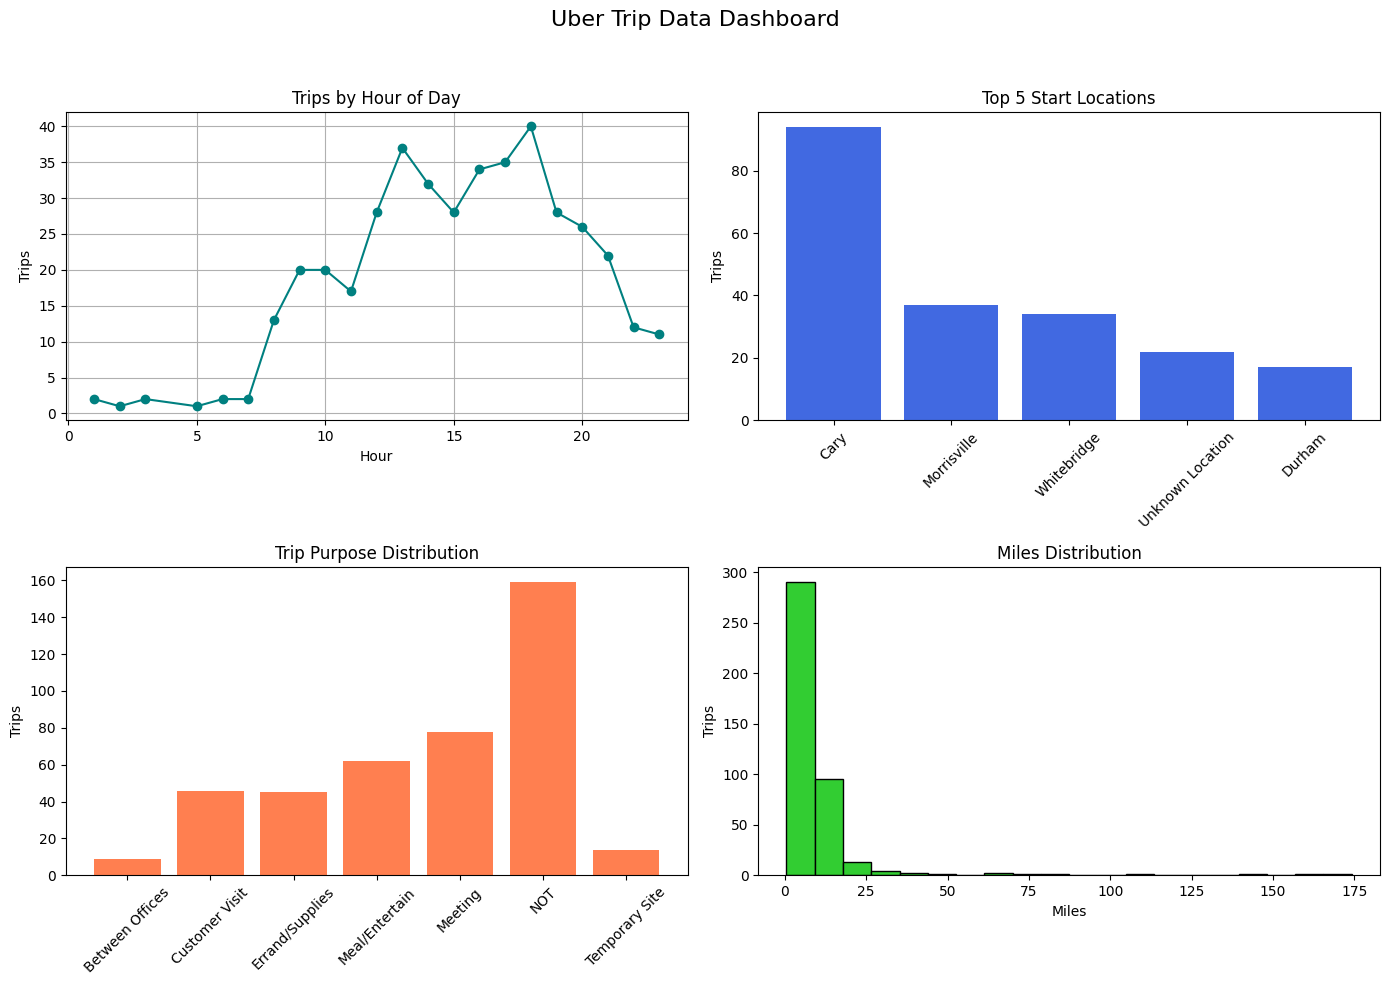

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert to datetime if needed
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])

# Prepare data
dataset['start_hour'] = dataset['START_DATE'].dt.hour
hourly_counts = dataset['start_hour'].value_counts().sort_index()

top_starts = dataset['START'].value_counts().head(5)

purpose_cols = [col for col in dataset.columns if col.startswith('PURPOSE_')]
purpose_sums = dataset[purpose_cols].sum()

# Start plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Uber Trip Data Dashboard', fontsize=16)

# 1. Trips by Hour
axs[0, 0].plot(hourly_counts.index, hourly_counts.values, marker='o', color='teal')
axs[0, 0].set_title('Trips by Hour of Day')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Trips')
axs[0, 0].grid(True)

# 2. Top Start Locations
axs[0, 1].bar(top_starts.index, top_starts.values, color='royalblue')
axs[0, 1].set_title('Top 5 Start Locations')
axs[0, 1].set_ylabel('Trips')
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Purpose Distribution
axs[1, 0].bar(purpose_sums.index.str.replace('PURPOSE_', ''), purpose_sums.values, color='coral')
axs[1, 0].set_title('Trip Purpose Distribution')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_ylabel('Trips')

# 4. Miles Histogram
axs[1, 1].hist(dataset['MILES'], bins=20, color='limegreen', edgecolor='black')
axs[1, 1].set_title('Miles Distribution')
axs[1, 1].set_xlabel('Miles')
axs[1, 1].set_ylabel('Trips')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [40]:
print(df.shape)


(1156, 7)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [10]:
print(df.columns)
df['PURPOSE'].fillna("NOT", inplace=True)

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')


In [11]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [13]:
df['day-night'] = pd.cut(x=df['time'],
                         bins=[0, 10, 15, 19, 24],
                         labels=['Morning', 'Afternoon', 'Evening', 'Night'])

# Remove missing and duplicate values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

([0, 1], [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

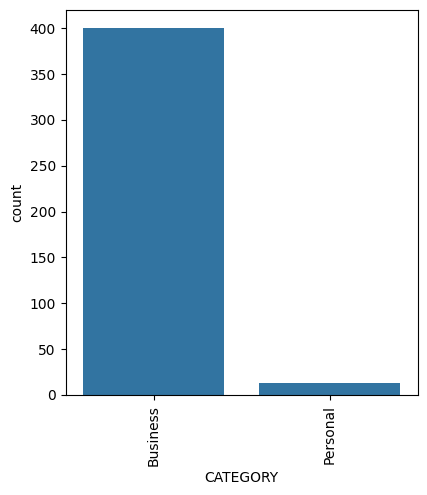

In [14]:
# Countplot for Category and Purpose
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=df['CATEGORY'])
plt.xticks(rotation=90)



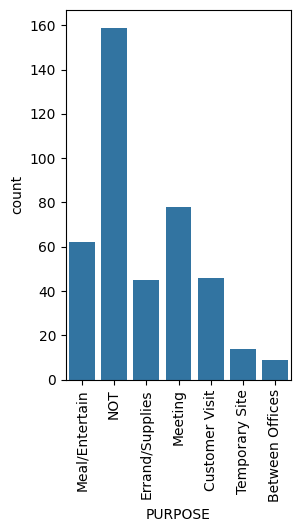

In [15]:
plt.subplot(1, 2, 2)
sns.countplot(x=df['PURPOSE'])
plt.xticks(rotation=90)
plt.show()




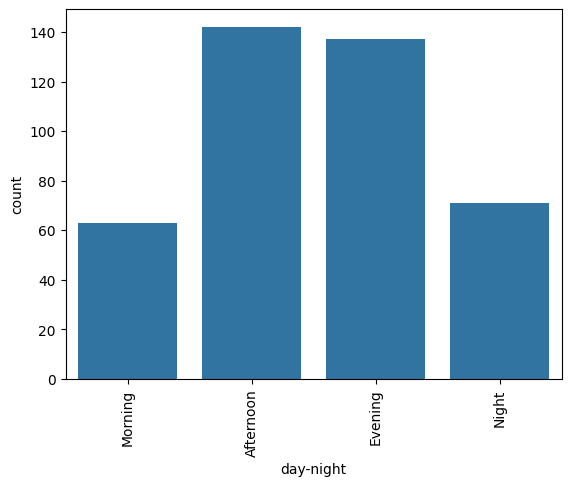

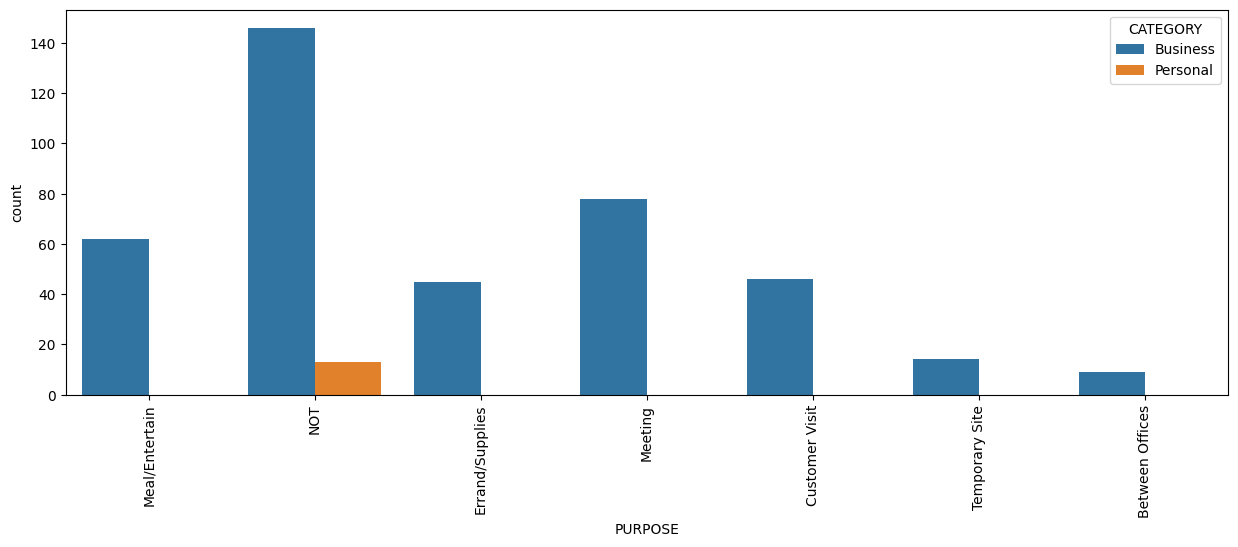

In [16]:
# Countplot for Day and Night Categories
sns.countplot(x=df['day-night'])
plt.xticks(rotation=90)
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

In [26]:
print(dataset.columns)



Index(['START_DATE', 'END_DATE', 'START', 'STOP', 'MILES', 'date', 'time',
       'day-night', 'CATEGORY_Business', 'CATEGORY_Personal',
       'PURPOSE_Between Offices', 'PURPOSE_Customer Visit',
       'PURPOSE_Errand/Supplies', 'PURPOSE_Meal/Entertain', 'PURPOSE_Meeting',
       'PURPOSE_NOT', 'PURPOSE_Temporary Site'],
      dtype='object')


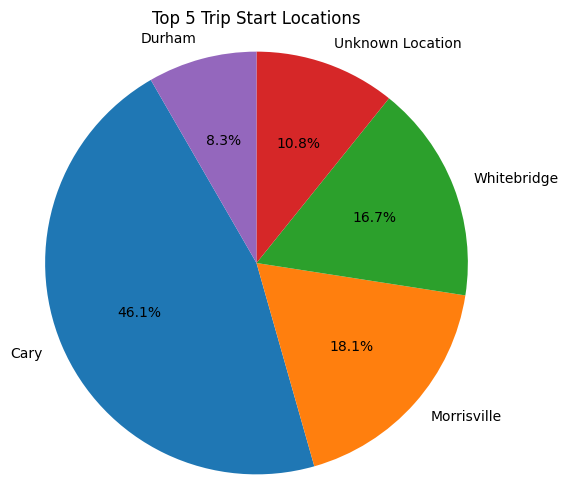

In [27]:
import matplotlib.pyplot as plt

# Use correct column name 'START'
start_counts = dataset['START'].value_counts().head(5)

plt.figure(figsize=(6,6))
plt.pie(start_counts, labels=start_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Top 5 Trip Start Locations')
plt.axis('equal')
plt.show()


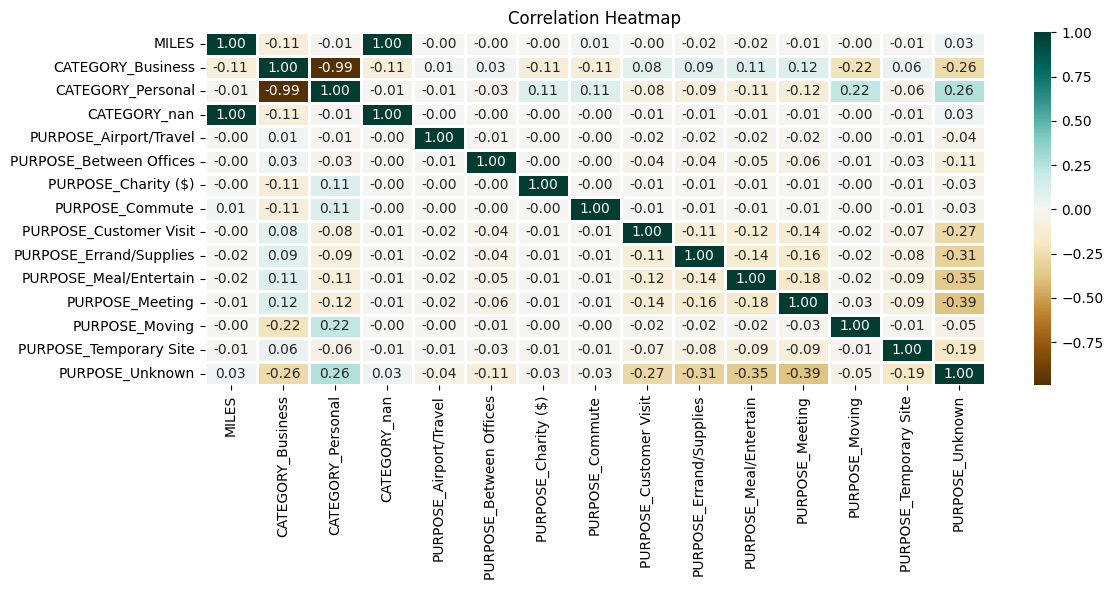

In [9]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("UberDataset (1).csv")

# Fill missing PURPOSE values (optional: you can also choose to drop or impute)
df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')

# One-Hot Encoding for categorical variables
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))

# Ensure the index matches original DataFrame
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)

# Drop original categorical columns and merge encoded columns
df_final = df.drop(columns=object_cols)
dataset = pd.concat([df_final, OH_cols], axis=1)

# Select only numerical columns for correlation analysis
numeric_dataset = dataset.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_dataset.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()




In [60]:
import pandas as pd

# Ensure START_DATE is in datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')

# Drop rows with missing PURPOSE, CATEGORY, START or START_DATE
df = df.dropna(subset=['PURPOSE', 'CATEGORY', 'START', 'START_DATE'])

# Summary 1: Count of top 3 trips per Purpose
purpose_counts = df['PURPOSE'].value_counts().head(3)
print("Top 3 Trips by Purpose:\n", purpose_counts)

# Summary 2: Count of top 3 trips per Category
category_counts = df['CATEGORY'].value_counts().head(3)
print("\nTop 3 Trips by Category:\n", category_counts)

# Summary 3: Count of top 3 trips per Start Location
start_counts = df['START'].value_counts().head(3)
print("\nTop 3 Trips by Start Location:\n", start_counts)

# Summary 4: Count of top 3 busiest Hours
df['Hour'] = df['START_DATE'].dt.hour
hourly_counts = df['Hour'].value_counts().sort_values(ascending=False).head(3)
print("\nTop 3 Busiest Hours:\n", hourly_counts)

# Summary 5: Count of top 3 Days of Week with most trips
df['Day'] = df['START_DATE'].dt.day_name()
day_counts = df['Day'].value_counts().head(3)
print("\nTop 3 Days of Week:\n", day_counts)


Top 3 Trips by Purpose:
 PURPOSE
Meeting            81
Meal/Entertain     64
Errand/Supplies    47
Name: count, dtype: int64

Top 3 Trips by Category:
 CATEGORY
Business    261
Name: count, dtype: int64

Top 3 Trips by Start Location:
 START
Cary           84
Morrisville    32
Whitebridge    18
Name: count, dtype: int64

Top 3 Busiest Hours:
 Hour
20    22
14    22
13    21
Name: count, dtype: int64

Top 3 Days of Week:
 Day
Friday      57
Monday      40
Thursday    37
Name: count, dtype: int64


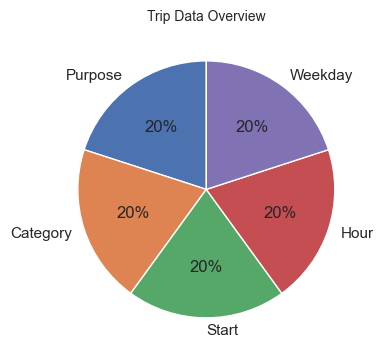

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime column is in datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')

# Count available (non-null) entries for each feature
counts = [
    df['PURPOSE'].dropna().shape[0],
    df['CATEGORY'].dropna().shape[0],
    df['START'].dropna().shape[0],
    df['START_DATE'].dt.hour.dropna().shape[0],
    df['START_DATE'].dt.day_name().dropna().shape[0]
]

labels = ['Purpose', 'Category', 'Start', 'Hour', 'Weekday']

# Short and compact pie chart
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.0f%%', startangle=90)
plt.title('Trip Data Overview', fontsize=10)
plt.tight_layout()
plt.show()



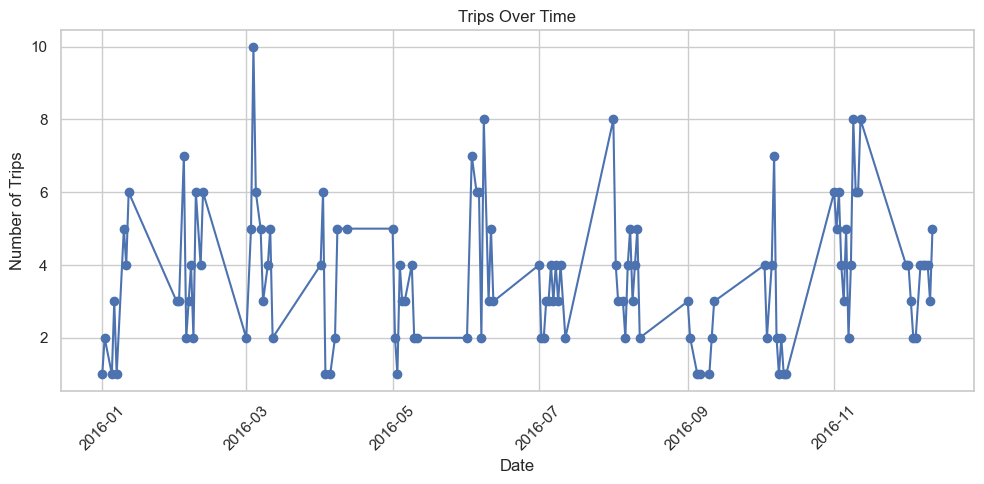

In [61]:
# Convert START_DATE to datetime if not already
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])

# Group by date
daily_trips = dataset.groupby(dataset['START_DATE'].dt.date).size()

plt.figure(figsize=(10,5))
plt.plot(daily_trips.index, daily_trips.values, marker='o')
plt.title('Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


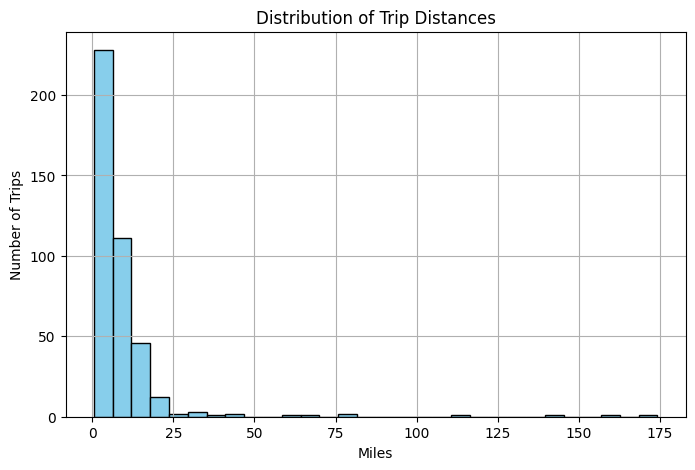

In [29]:
plt.figure(figsize=(8,5))
plt.hist(dataset['MILES'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Distances')
plt.xlabel('Miles')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


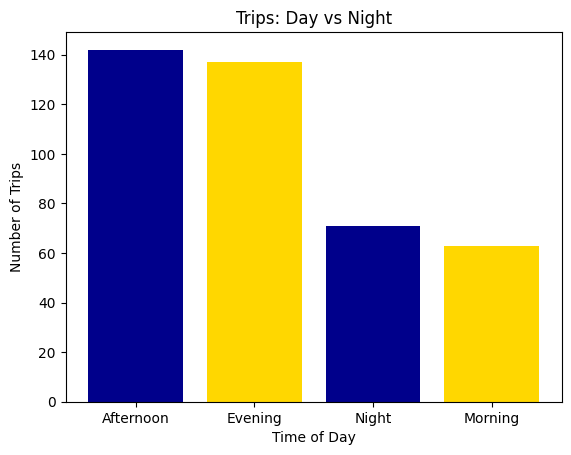

In [30]:

day_night_counts = dataset['day-night'].value_counts()
plt.bar(day_night_counts.index, day_night_counts.values, color=['darkblue', 'gold'])
plt.title('Trips: Day vs Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.show()



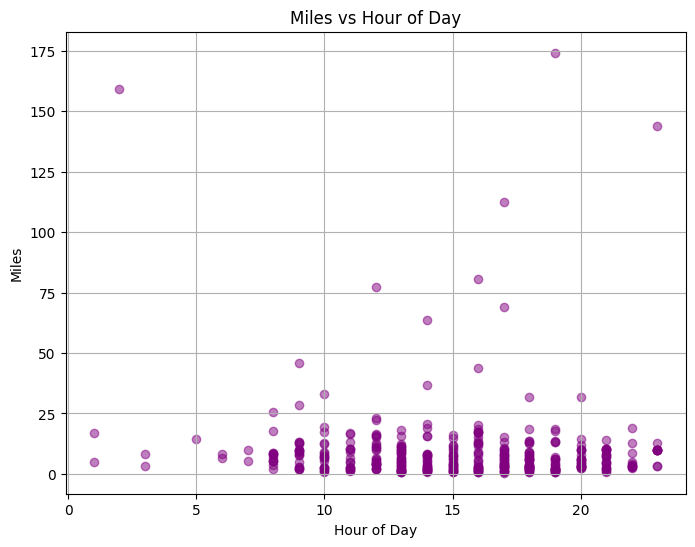

In [32]:

# Extract hour from START_DATE
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])
dataset['start_hour'] = dataset['START_DATE'].dt.hour

plt.figure(figsize=(8,6))
plt.scatter(dataset['start_hour'], dataset['MILES'], alpha=0.5, color='purple')
plt.title('Miles vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Miles')
plt.grid(True)
plt.show()



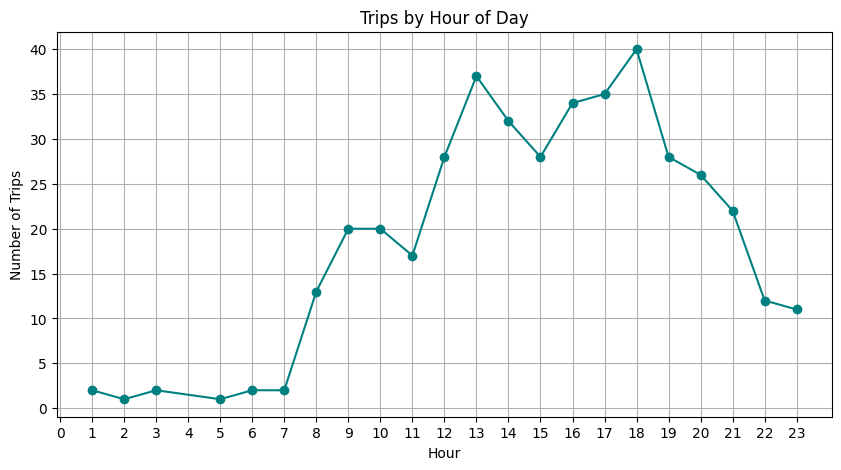

In [33]:

# Extract hour from START_DATE
dataset['start_hour'] = pd.to_datetime(dataset['START_DATE']).dt.hour
# Count trips per hour
hourly_trips = dataset['start_hour'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(hourly_trips.index, hourly_trips.values, marker='o', color='teal')
plt.title('Trips by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(range(0,24))
plt.show()



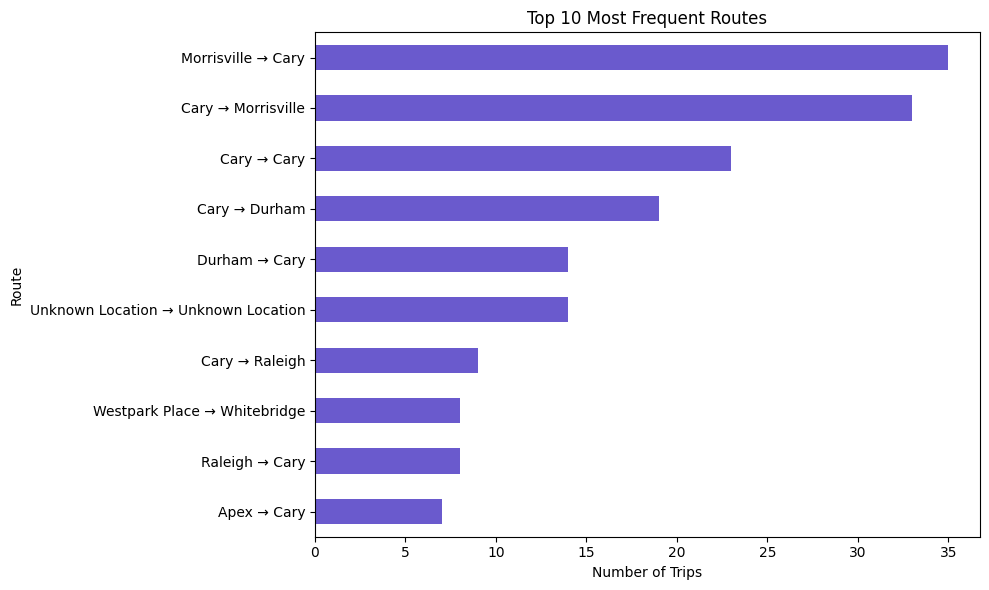

In [34]:
# Create a new column with route name
dataset['ROUTE'] = dataset['START'] + " → " + dataset['STOP']

top_routes = dataset['ROUTE'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_routes.plot(kind='barh', color='slateblue')
plt.title('Top 10 Most Frequent Routes')
plt.xlabel('Number of Trips')
plt.ylabel('Route')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


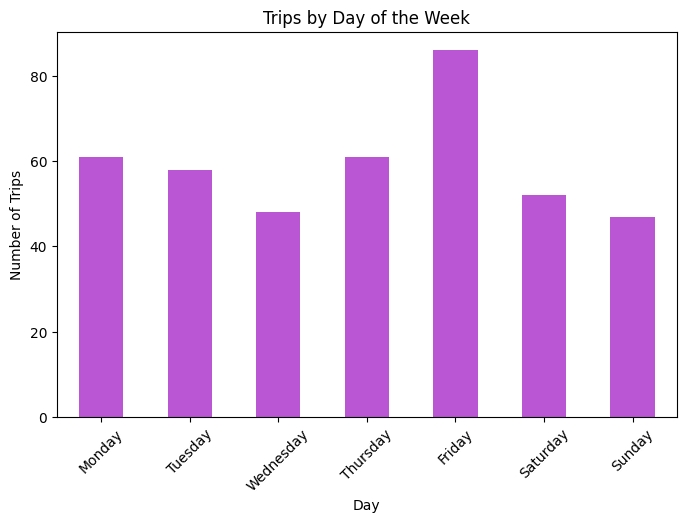

In [35]:

# Extract weekday from START_DATE
dataset['weekday'] = pd.to_datetime(dataset['START_DATE']).dt.day_name()
weekday_counts = dataset['weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(8,5))
weekday_counts.plot(kind='bar', color='mediumorchid')
plt.title('Trips by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()



In [54]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[ 8  3  0  0]
 [ 2 22  6  0]
 [ 0  7 21  1]
 [ 0  0  6  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.69      0.73      0.71        30
           2       0.64      0.72      0.68        29
           3       0.88      0.54      0.67        13

    accuracy                           0.70        83
   macro avg       0.75      0.68      0.70        83
weighted avg       0.71      0.70      0.70        83



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define your models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and Evaluate Each Model (show accuracy in decimal)
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"{name} Accuracy: {accuracy:.4f}")



Logistic Regression Accuracy: 0.6867
Random Forest Accuracy: 1.0000
Support Vector Machine Accuracy: 0.5904
Decision Tree Accuracy: 1.0000
K-Nearest Neighbors Accuracy: 0.5663


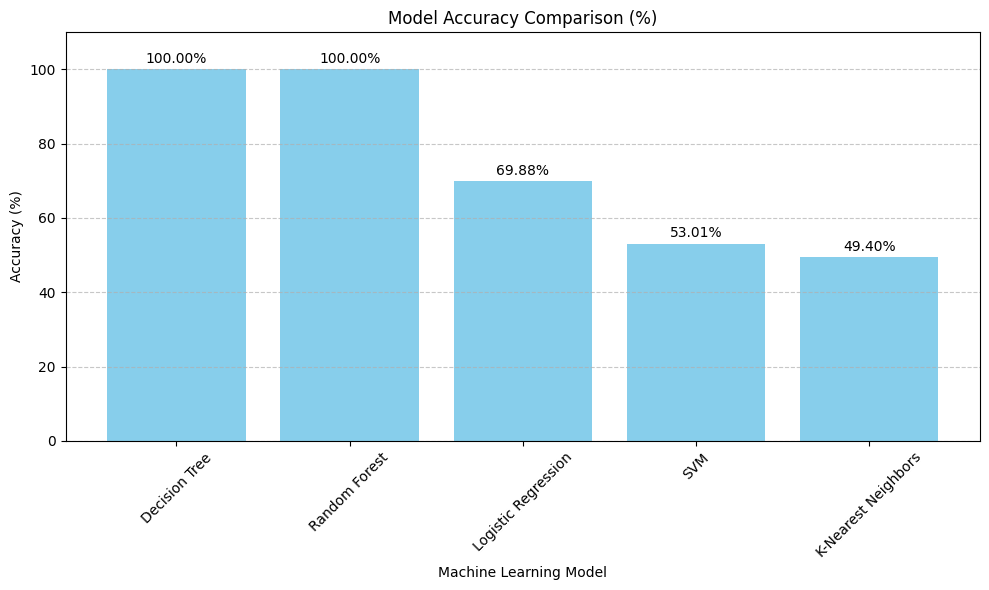

In [6]:
import matplotlib.pyplot as plt

# Accuracy values (in %)
model_names = [
    "Decision Tree",
    "Random Forest",
    "Logistic Regression",
    "SVM",
    "K-Nearest Neighbors"
]

accuracy_values = [
    100.00,  # Decision Tree
    100.00,  # Random Forest
    69.88,   # Logistic Regression
    53.01,   # SVM
    49.40    # KNN
]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_values, color='skyblue')

# Add value labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.title("Model Accuracy Comparison (%)")
plt.ylabel("Accuracy (%)")
plt.xlabel("Machine Learning Model")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [63]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Train and Evaluate Each Model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage

    print(f" Accuracy of {name}: {accuracy:.2f}%")  # Display percentage
    print("\n Classification Report:\n", classification_report(y_test, y_pred))
    print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("=" * 60)



Training Logistic Regression...
 Accuracy of Logistic Regression: 69.88%

 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.69      0.73      0.71        30
           2       0.64      0.72      0.68        29
           3       0.88      0.54      0.67        13

    accuracy                           0.70        83
   macro avg       0.75      0.68      0.70        83
weighted avg       0.71      0.70      0.70        83


 Confusion Matrix:
 [[ 8  3  0  0]
 [ 2 22  6  0]
 [ 0  7 21  1]
 [ 0  0  6  7]]
Training Decision Tree...
 Accuracy of Decision Tree: 100.00%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        13

    accuracy            